### Student Performance Indicator EDA

Lifecycle of Machine Learning Project
- Understanding the problem statement
- Data Collection
- Data checks to perform
- Exploratory Data Analysis
- Data Preprocessing
- Model Training
- Choose the best model

### 1. Problem Statement
- This project tries to understand how the student's performance (test scores) is affected by other variables such as Gender, 
Ethnicity, Parental Level of education, Lunch and test preparation course

### 2. Data Collection
- Data Source : https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/data
- Data consists of 8 columns and 1000 rows. 

In [1]:
#2.1 Import data and required packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/RadhikaMaheshwari/Desktop/Test/KrishNaikUdemyProject/StudentsPerformance.csv')

In [3]:
# Show top 5 records
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# Shape of dataset
df.shape

(1000, 8)

In [5]:
#2.2 Dataset information

#Gender: Sex of students -> (Male/Female)
#race/ethnicity: Ethnicity of students -> (Group A, B, C, D and E)
#parental level of education: parents highest level of education: (bachelor's degree, some college, master's degree, associate's degree, high school)
#lunch: having lunch before test (standard or free/reduced)
#test preparation course: complete or not complete before test
#math score
#reading score
#writing score

### 3: Data checks to perform
- Check for missing values
- Check for duplicate values
- Check for outliers
- Check data type
- Check the number of unique values in a column
- Check statistics of data set
- Check various categories present in the different categorical column

In [7]:
#3.1 Check for missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
# Observation 1: There is no missing value in the dataset

In [9]:
#3.2 Check for duplicate values
df.duplicated().sum()

0

In [10]:
# Observation 2: There are no duplicate values in the dataset

In [14]:
#3.3 Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [21]:
# Observation 3: 
# Numerical colummns - Math score, Reading score, Writing score
# Categorical columns - gender, race/ethnicuty, parental level of education, lunch, test preparation course. 

In [22]:
#3.4 Check the number of unique values of each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [23]:
#3.5 Check statistics of the dataset
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [24]:
# Observation 3: 
# All means are very close to each other for all the numerical features. They lie between 66-69.
# Variation of all the three numerical features is similar as all have similar standard deviaton scores. 
# Minimum score for Math is 0 however for reading and writing it is 17 and 10 respectively.

In [34]:
#3.6 Exploring data
print(f"Categories in gender variable are : {df['gender'].unique()},")
print(f"Categories in race/ethnicity variable are: {df['race/ethnicity'].unique()}")
print(f"Categories in parental level of education variable are : {df['parental level of education'].unique()}")
print(f"Categories in lunch variable are: {df['lunch'].unique()}")
print(f"Categories in test preparation course variable are: {df['test preparation course'].unique()}")

Categories in gender variable are : ['female' 'male'],
Categories in race/ethnicity variable are: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education variable are : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable are: ['standard' 'free/reduced']
Categories in test preparation course variable are: ['none' 'completed']


In [40]:
# Define numerical and categorical variables
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns 
print(f"We have {len(numeric_features)} numerical features, namely: {numeric_features}")
print(f"We have {len(categorical_features)} categorical features, namely: {categorical_features}")

We have 3 numerical features, namely: ['math score', 'reading score', 'writing score']
We have 5 categorical features, namely: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [41]:
# 3.7 Adding columns for "Total score" and "Average"
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score'] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [50]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()
print(f"Number of students with full marks in Maths = {math_full}")
print(f"Number of students with full marks in reading  = {reading_full}")
print(f"Number of students with full marks in writing = {writing_full}")

Number of students with full marks in Maths = 7
Number of students with full marks in reading  = 17
Number of students with full marks in writing = 14


In [47]:
reading_full

17

In [52]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f"Number of students with marks less than 20 in reading = {reading_less_20}")
print(f"Number of students with marks less than 20 in writing = {writing_less_20}")
print(f"Number of students with marks less than 20 in math = {math_less_20}")

Number of students with marks less than 20 in reading = 1
Number of students with marks less than 20 in writing = 3
Number of students with marks less than 20 in math = 4


In [53]:
# Observation 4: 
# - Students performed the worst in maths
# - Best performance was in reading

### 4. Exploring data using visualizations

4.1 Visualiza average score distribution to draw conclusion
    - Histograms
    - Kernel Density Estimation
    

<Axes: xlabel='average', ylabel='Count'>

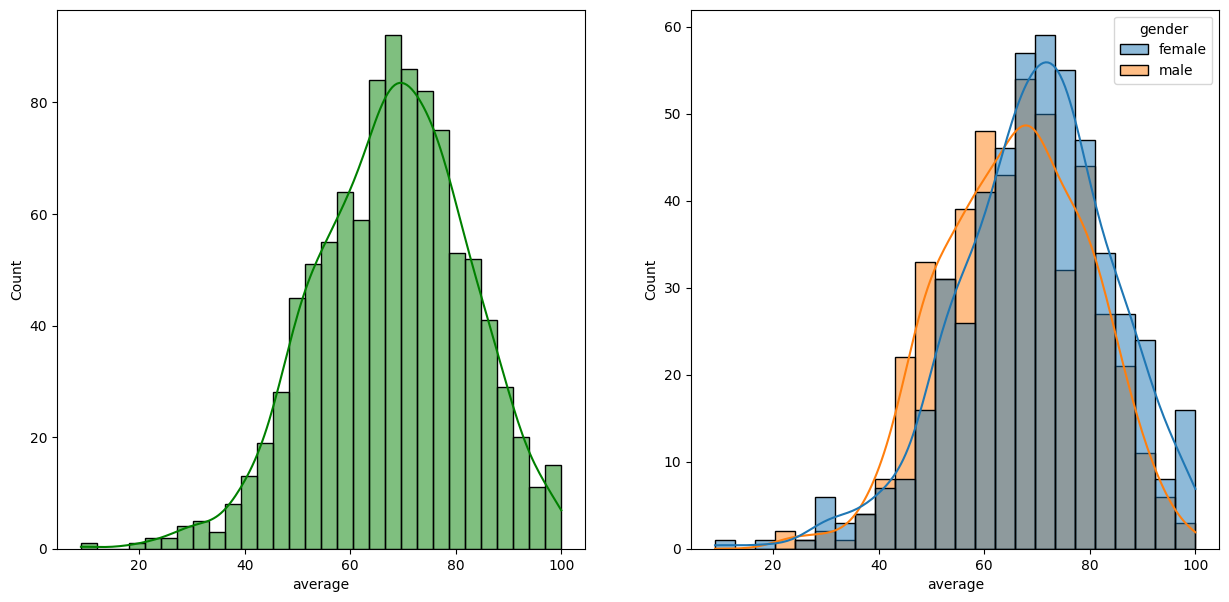

In [57]:
# 4.1.1 Histogram and KDE

fig, axs = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data=df, x = 'average', bins = 30, kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data=df, x = 'average', kde = True, hue = 'gender')

In [58]:
# Observation 5: 
# - Female students tend to perform well as compared to male students

<Axes: xlabel='average', ylabel='Count'>

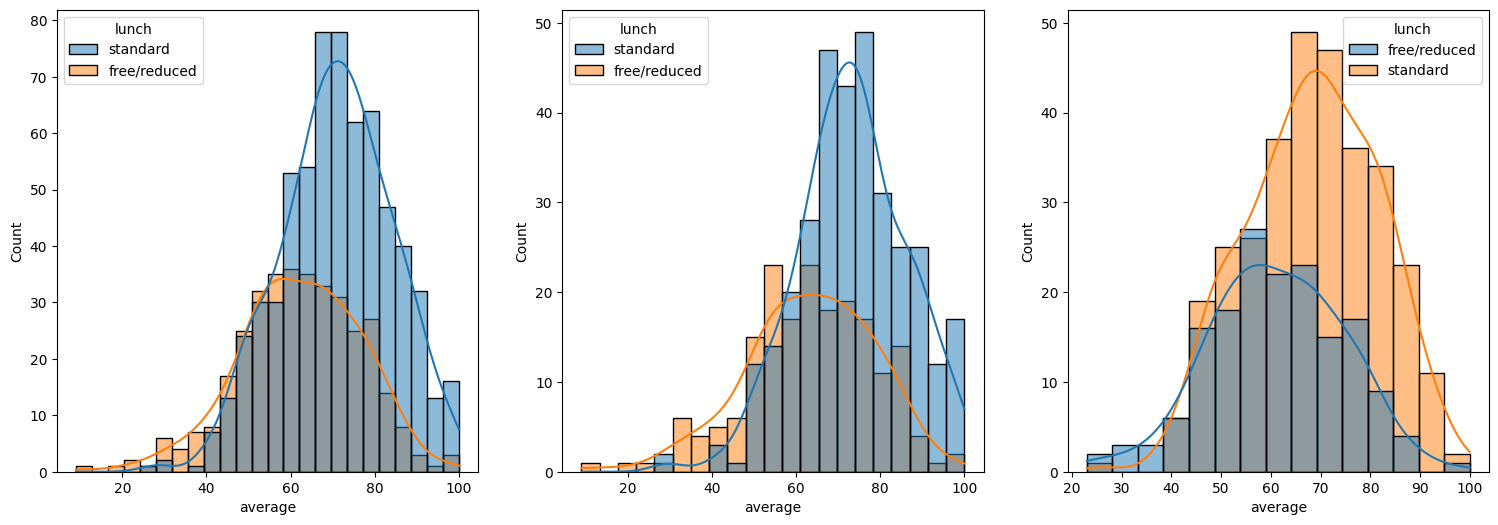

In [66]:
plt.subplots(1, 3, figsize = (25, 6))
plt.subplot(141)
sns.histplot(data = df, x = 'average', kde = True, hue = 'lunch')
plt.subplot(142)
sns.histplot(data= df[df['gender'] == 'female'], x = 'average', kde = True, hue = 'lunch' )
plt.subplot(143)
sns.histplot(data = df[df['gender'] == 'male'], x = 'average', kde = True, hue = 'lunch')

In [67]:
# Observation 6: 
# - Standard lunch helps perform well in exams
# - Standard lunch helps perform well irrespective of gender

<Axes: xlabel='average', ylabel='Count'>

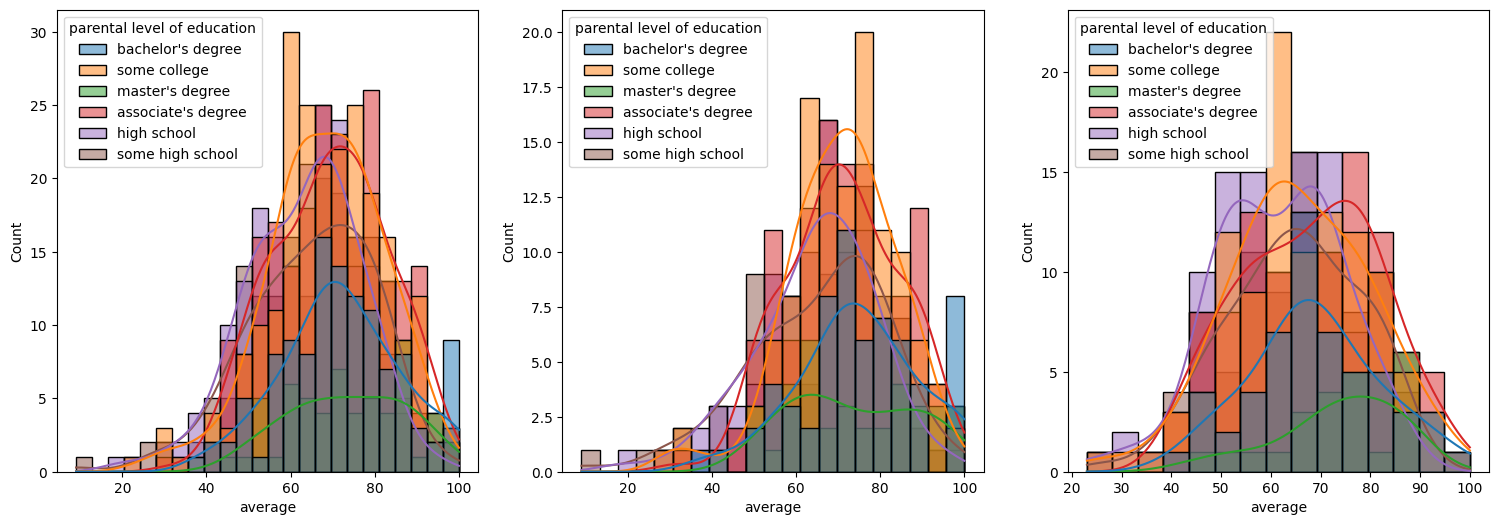

In [74]:
plt.subplots(1, 3, figsize = (25, 6))
plt.subplot(141)
sns.histplot(data = df, x = 'average', hue = df['parental level of education'], kde = True, palette=sns.color_palette())
plt.subplot(142)
sns.histplot(data = df[df['gender'] == 'female'], x = 'average', hue = df['parental level of education'], 
             kde = True, palette=sns.color_palette())
plt.subplot(143)
sns.histplot(data = df[df['gender'] == 'male'], x = 'average', kde = True, hue = df['parental level of education'], palette=sns.color_palette())

In [75]:
# Observation 7:
# - Stduents whose parents have completed a master's degree do not generally score well in exams. 

<Axes: xlabel='average', ylabel='Count'>

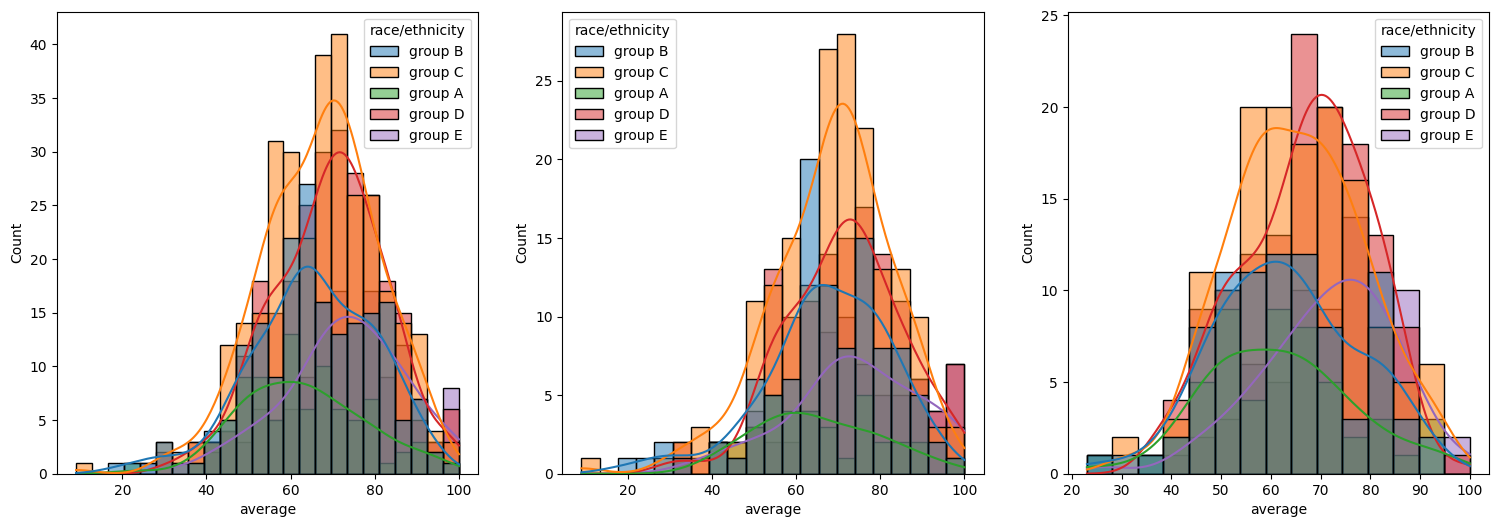

In [78]:
plt.subplots(1, 3, figsize = (25, 6))
plt.subplot(141)
sns.histplot(data = df, x = 'average', hue = df['race/ethnicity'], kde = True)
plt.subplot(142)
sns.histplot(data = df[df['gender'] == 'female'], x = 'average', kde = True, hue = df['race/ethnicity'])
plt.subplot(143)
sns.histplot(data = df[df['gender'] == 'male'], x = 'average', kde = True, hue = df['race/ethnicity'])

In [79]:
# Observation 8:
# - Group A and B tend to perform poorly in exam irrespective of the gender. 

<Axes: title={'center': 'Writing Score'}, ylabel='writing score'>

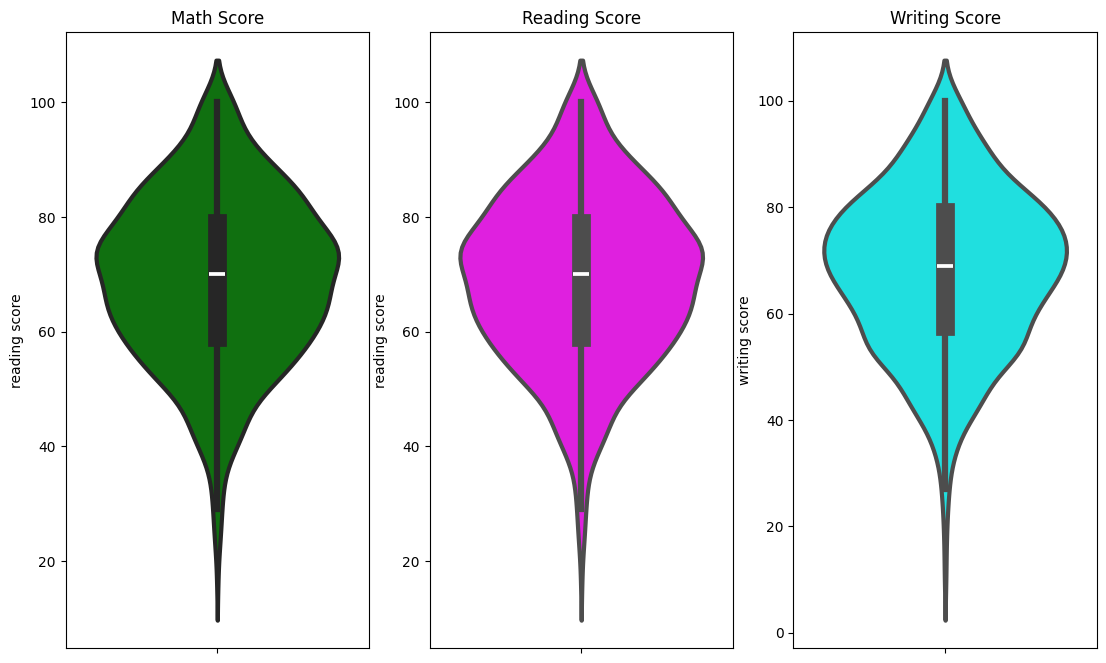

In [93]:
plt.figure(figsize = (18, 8))
plt.subplot(1, 4, 1)
plt.title('Math Score')
sns.violinplot(y='reading score', data = df, color = 'green', linewidth=3)
plt.subplot(1, 4, 2)
plt.title('Reading Score')
sns.violinplot(data= df, y='reading score', color = 'magenta', linewidth=3)
plt.subplot(1, 4, 3)
plt.title('Writing Score')
sns.violinplot(data = df, y = 'writing score', color = 'cyan', linewidth=3)

In [94]:
# Observation 9:
# - Most of the students scored marks between 60-80 in all three subjects

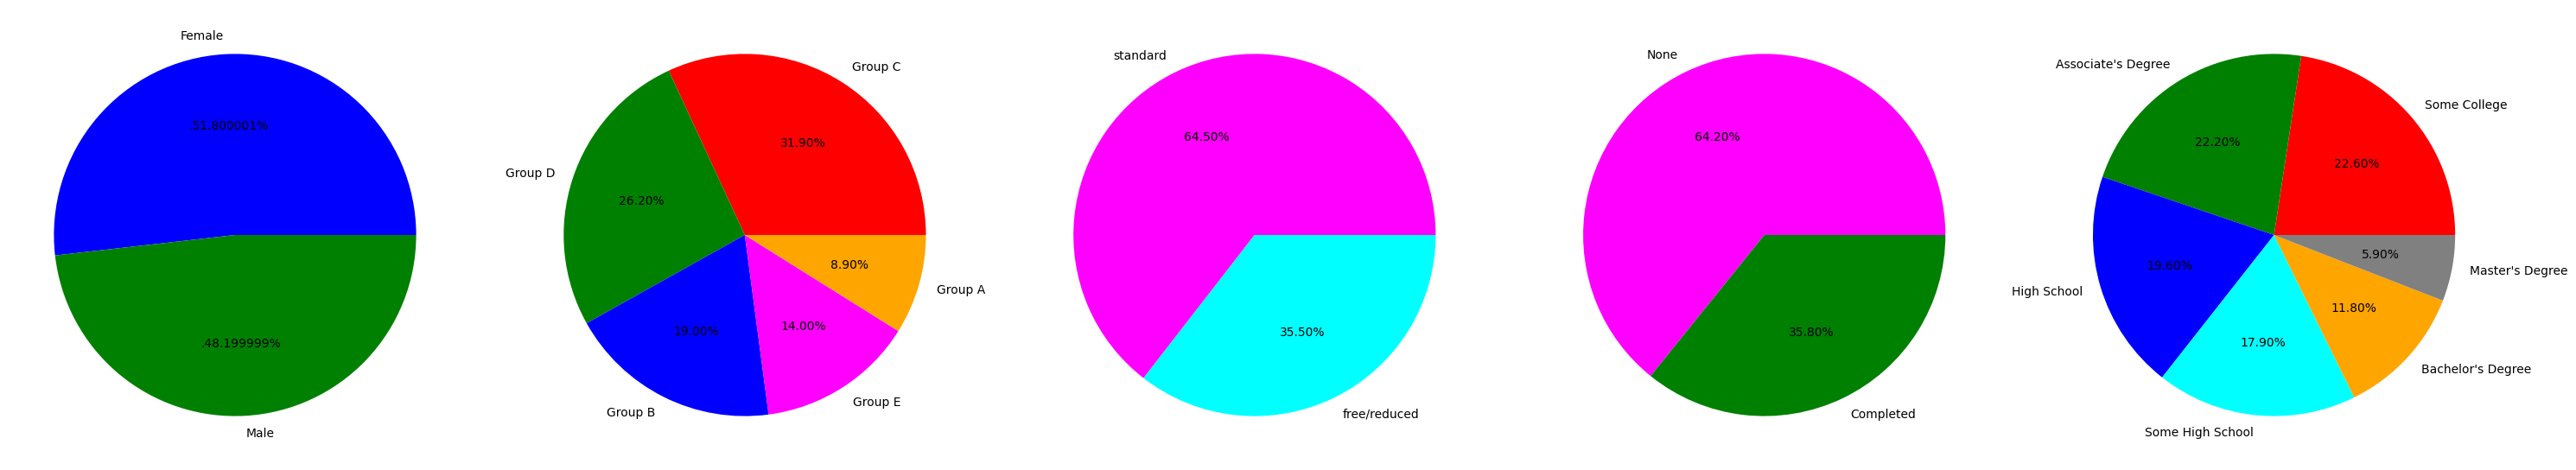

In [130]:
# Univariate analysis using pie plot

plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['blue', 'green']

plt.pie(size, colors= color, labels= labels, autopct='.%2f%%')

plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'magenta', 'orange']

plt.pie(size, colors=color, labels=labels, autopct='%2.2f%%')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'standard', 'free/reduced'
color = ['magenta', 'cyan']

plt.pie(size, labels = labels, colors = color, autopct = '%2.2f%%')

plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['magenta', 'green']

plt.pie(size, labels= labels, colors = color, autopct = '%2.2f%%')

plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, labels = labels, colors = color, autopct = '%2.2f%%')

plt.axis('off')
plt.tight_layout()
plt.grid()
plt.show()

In [131]:
# Obervation 10:
# - Number of male and female is almost equal
# - Group C has the maximum number of students
# - Number of students who have standard lunch are greater
# - Not many students have enrolled in the test preparation course
# - Most of the parents have either went to some college or high school or have an associate degree.

([<matplotlib.patches.Wedge at 0x1468709d610>,
 [Text(-0.06217041096298424, 1.0982417038160106, 'Male'),
  Text(0.06782226650507357, -1.1980818587083752, 'Female')],
 [Text(-0.033911133252536856, 0.5990409293541875, '51.80%'),
  Text(0.03956298879462625, -0.698881084246552, '48.20%')])

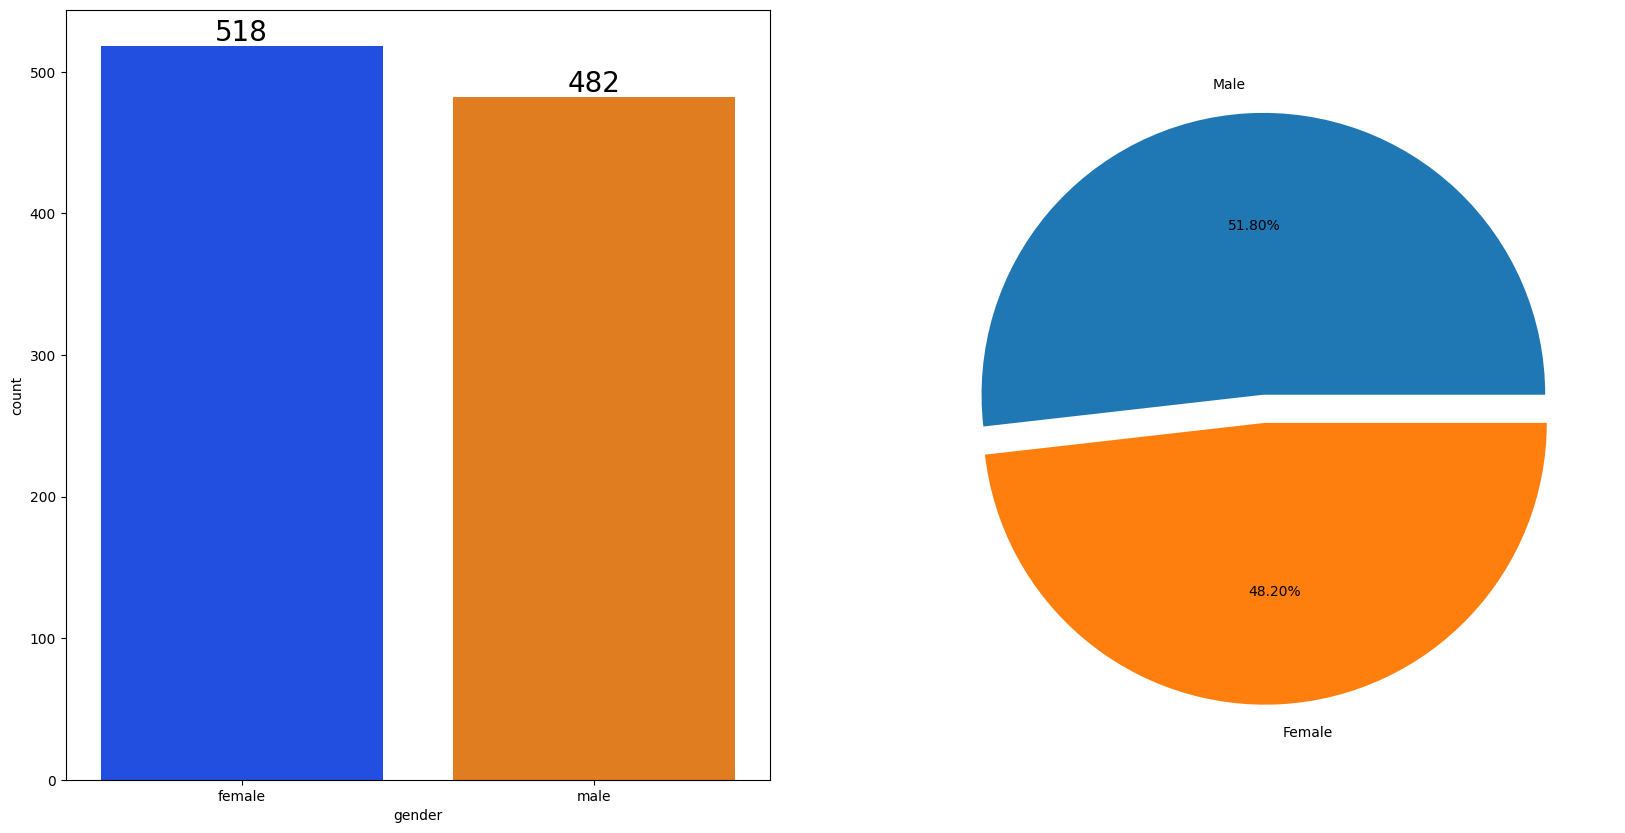

In [161]:
# Feaure wise visualization
# Gender column
f, ax = plt.subplots(1, 2, figsize = (20, 10))
sns.countplot(x = df['gender'], data = df, palette='bright', ax = ax[0], saturation=0.75)

for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 20)

plt.pie(x = df['gender'].value_counts(), labels = ['Male', 'Female'], explode = [0, 0.1], autopct='%2.2f%%')


In [140]:
# Observation 11: Gender is a balanced column. 

In [173]:
gender_group = df.groupby('gender')['average'].mean()
gender_group

gender
female    69.569498
male      65.837483
Name: average, dtype: float64

<Axes: xlabel='average'>

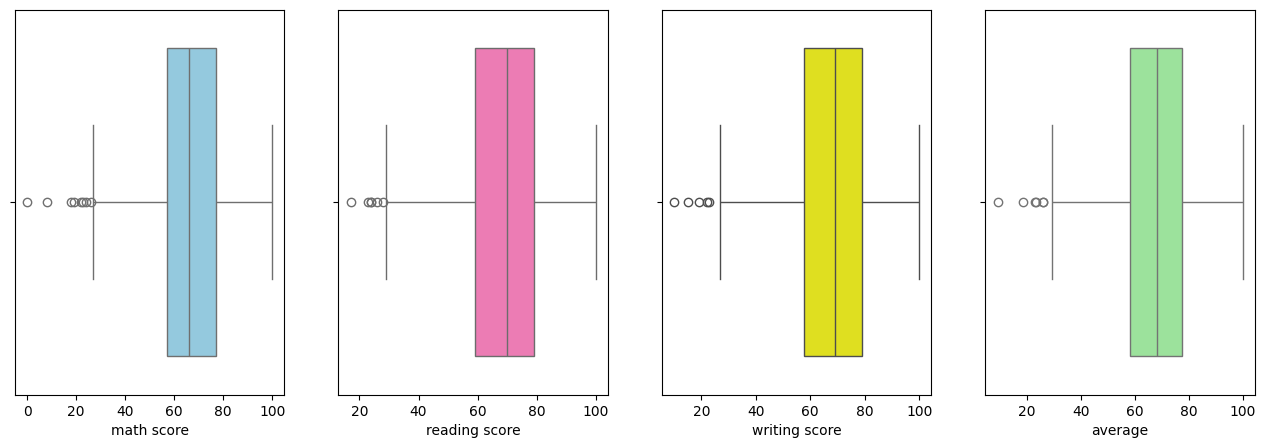

In [183]:
# Outlier detection
plt.subplots(1, 4, figsize=(16, 5))
plt.subplot(141)
sns.boxplot(x= df['math score'], color = 'skyblue')
plt.subplot(142)
sns.boxplot(x=df['reading score'], color = 'hotpink')
plt.subplot(143)
sns.boxplot(x = df['writing score'], color = 'yellow')
plt.subplot(144)
sns.boxplot(x = df['average'], color = 'lightgreen')

In [184]:
# Observation: There are outliers present in all the numerical columns

<Axes: xlabel='average', ylabel='Count'>

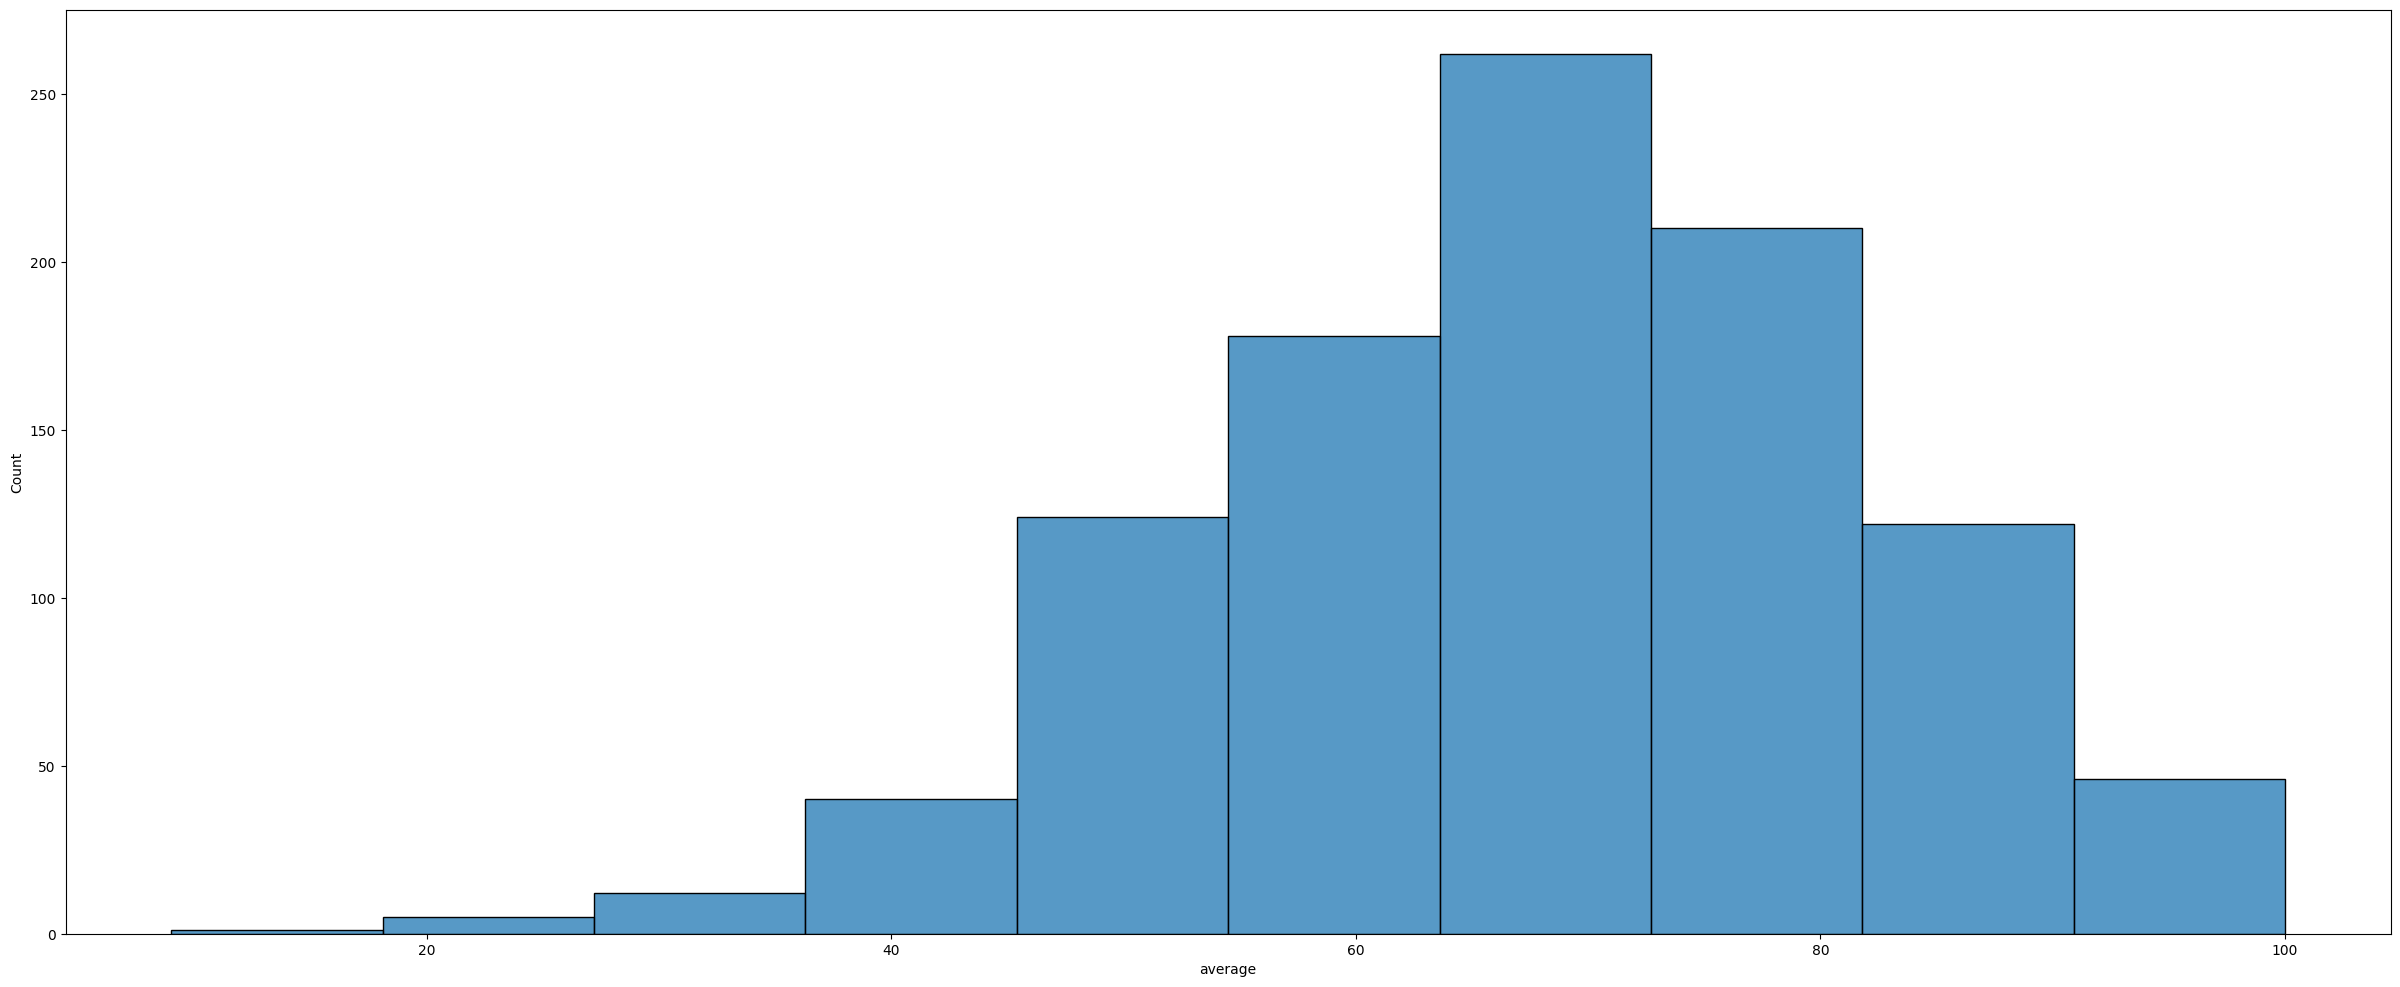

In [188]:
# Find the distribution of average column
sns.histplot(data = df, x = df['average'], bins = 10)

In [189]:
# Observation: Average is normally distributed with a slight skew on the left. 

<Axes: xlabel='math score', ylabel='Count'>

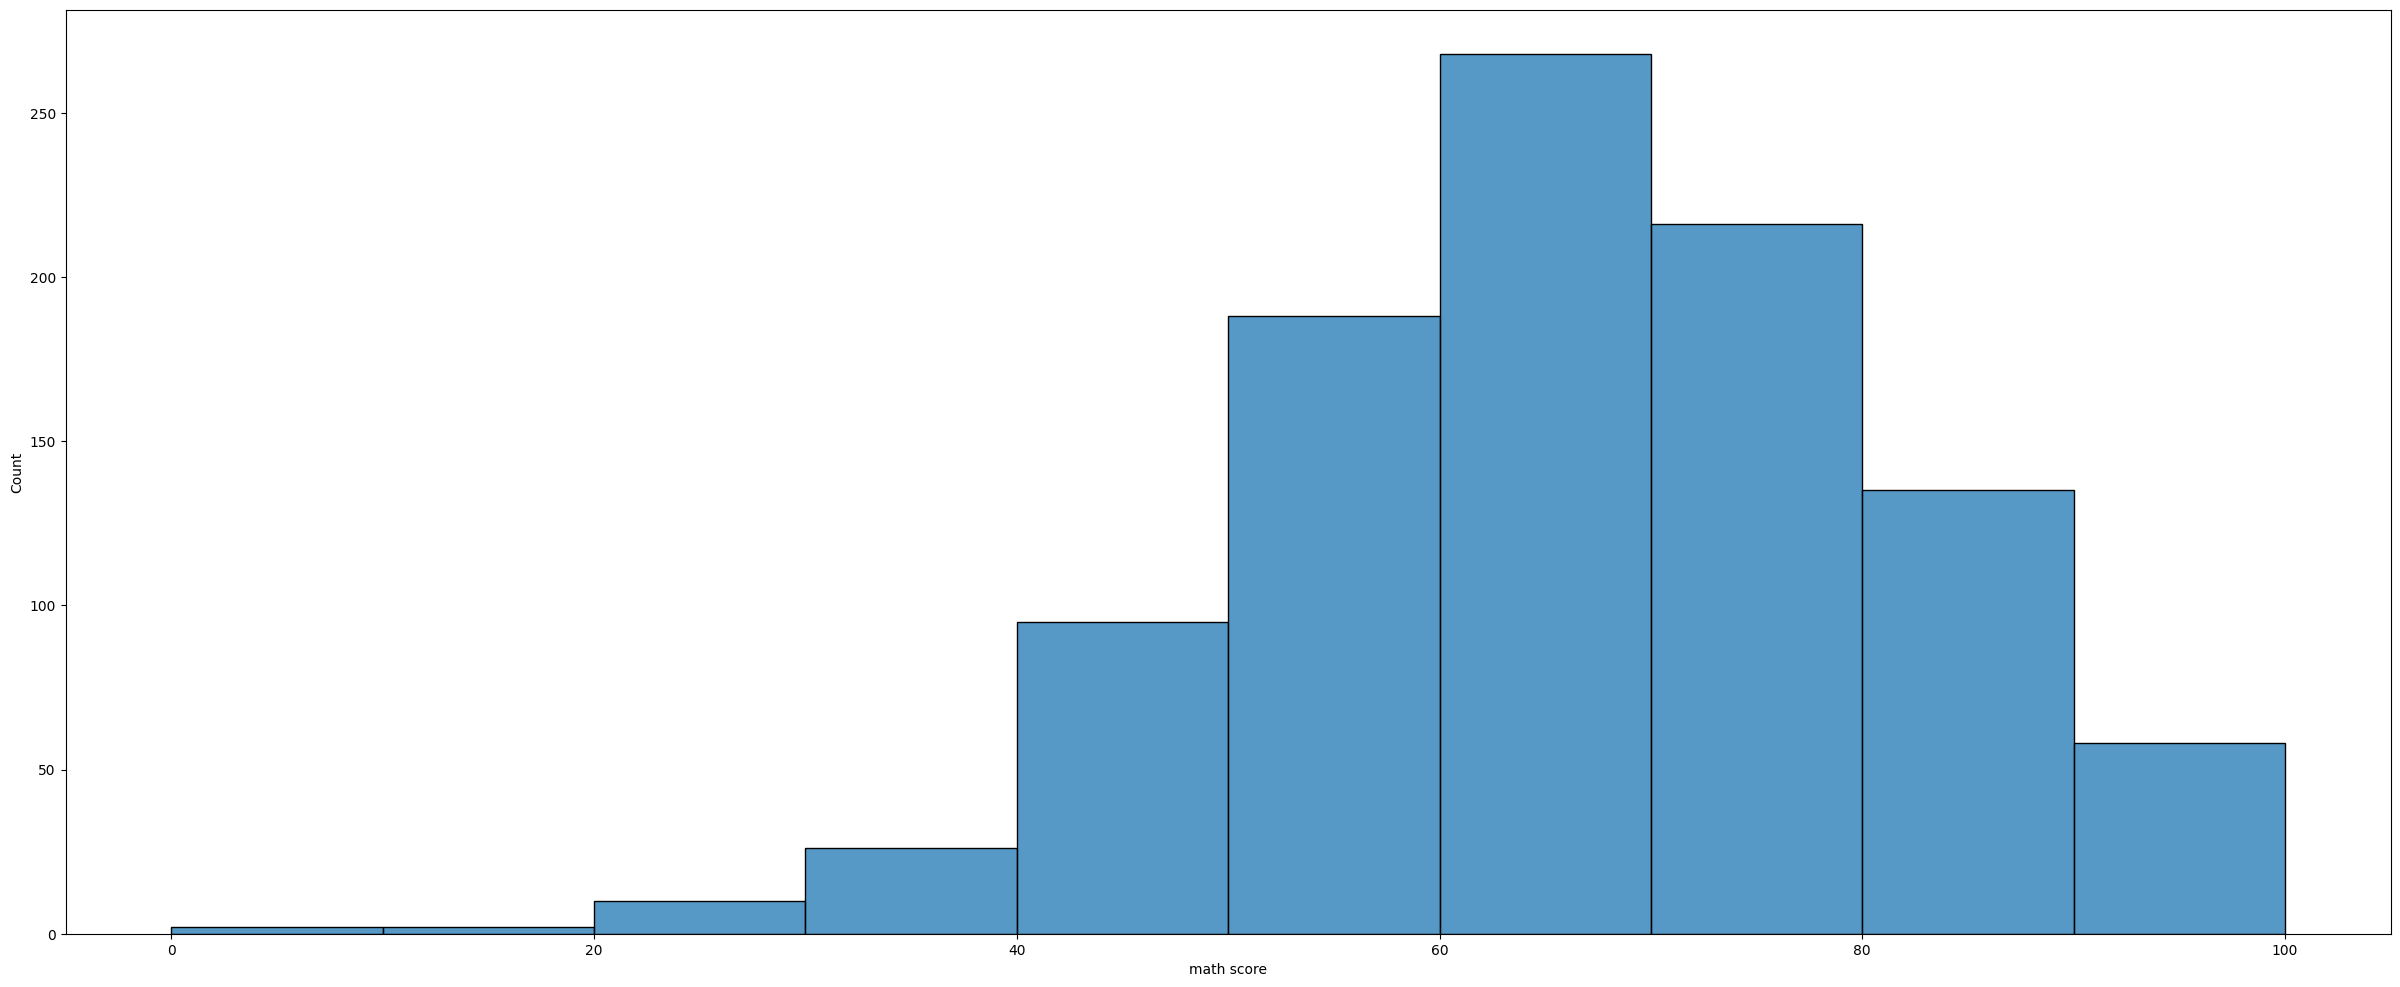

In [193]:
# Check the distribution of math score
sns.histplot(data = df, x = df['math score'], bins = 10)

In [194]:
# Observation: Math score is normally distributed with a slight skew on the left. 

<Axes: xlabel='reading score', ylabel='Count'>

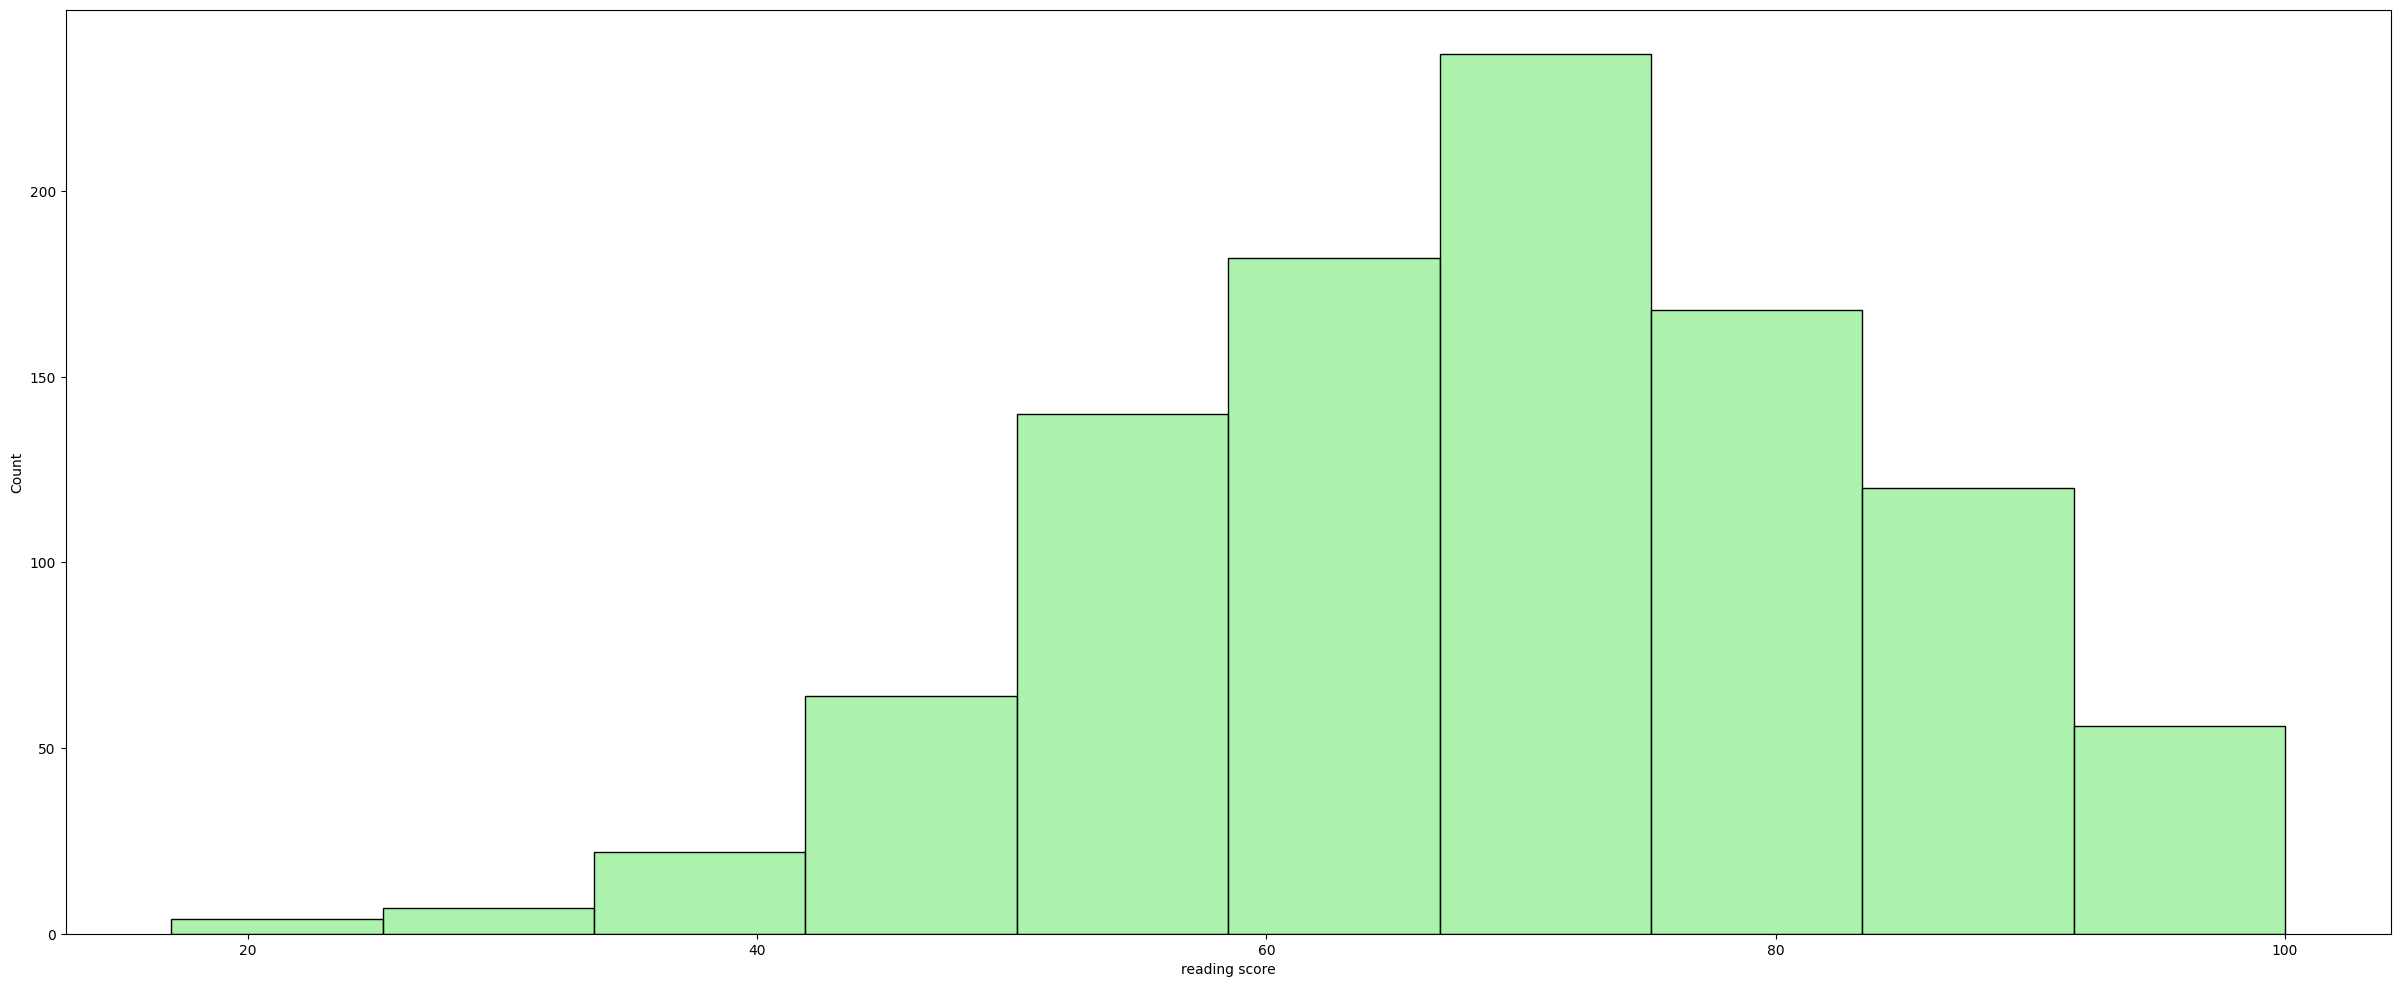

In [199]:
# Distribution of reading score
sns.histplot(data = df, x = df['reading score'], bins = 10, color = 'lightgreen')

In [196]:
# Observation: Reading score is normally distributed with a slight skew on the left. 

<Axes: xlabel='writing score', ylabel='Count'>

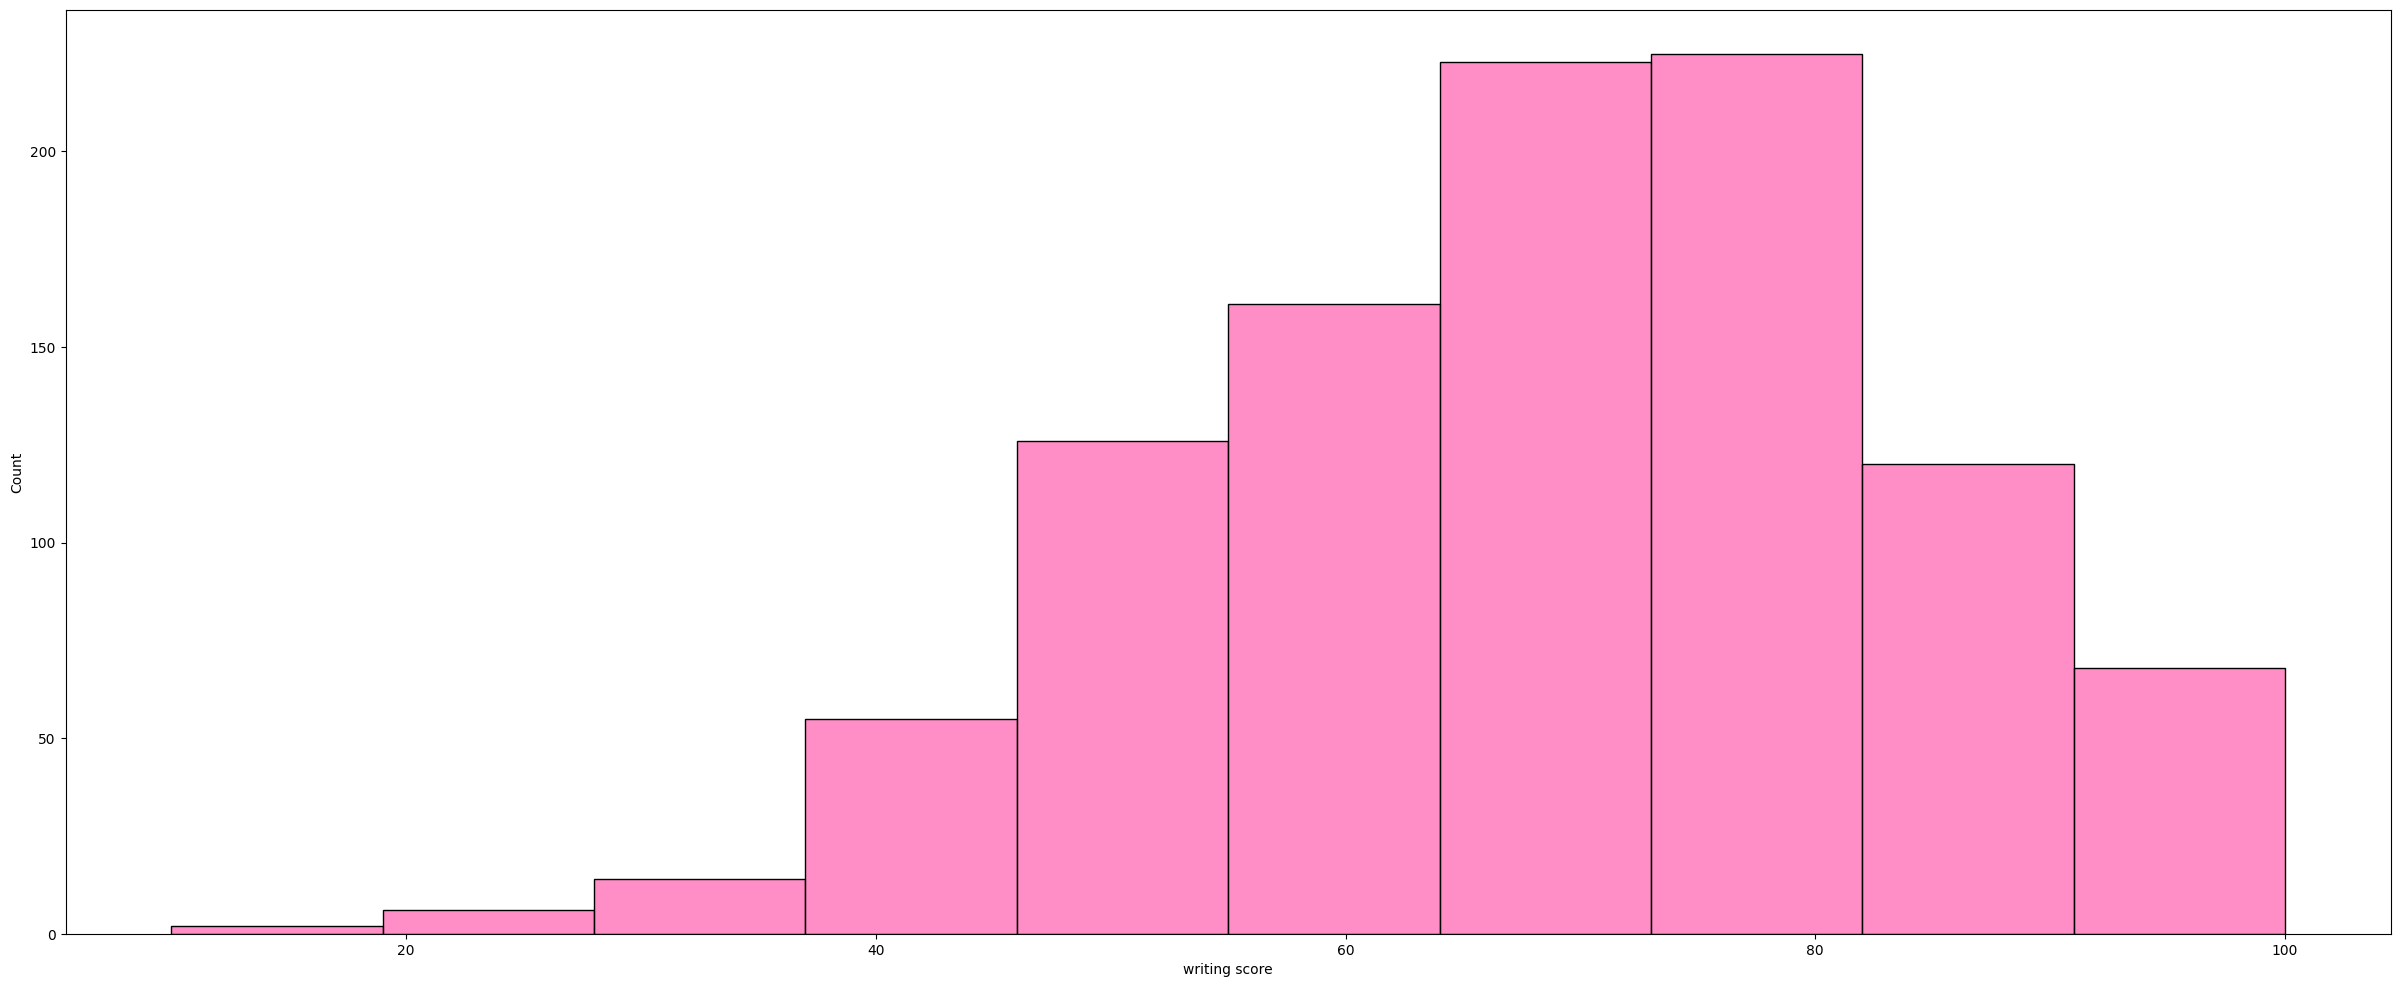

In [198]:
# Distribution of writing scores
sns.histplot(data = df, x = df['writing score'], bins = 10, color = 'hotpink')

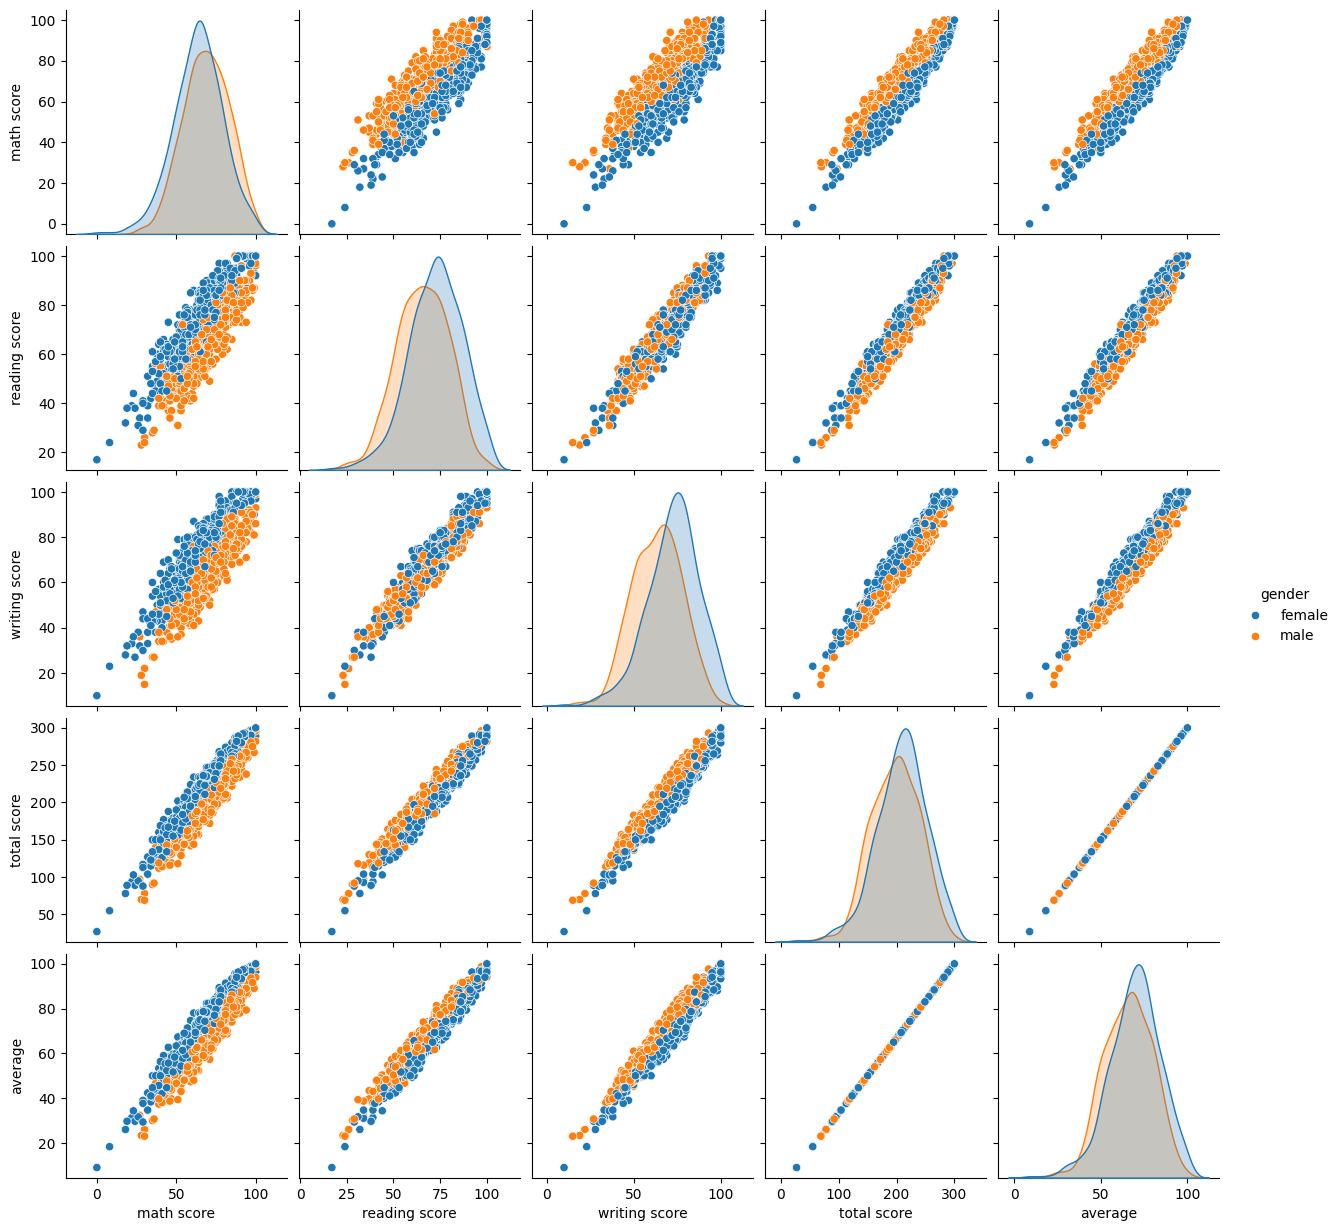

In [200]:
# Pair plots
sns.pairplot(data = df, hue = 'gender')